# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][HW010] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
def extend_ones(X):
    return np.hstack((X, np.ones(len(X)).reshape(-1, 1)))

class NormalLR:
    def __init__(self):
        self.w = None
        
    def fit(self, X, y):
        x = extend_ones(X)
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))

    def predict(self, X):
        x = extend_ones(X)
        return x.dot(self.w)

In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.010061993089028562


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации

С регуляризацией Лассо мы теперь минимизируем функцию

Пусть $N$ -- количество примеров, тогда функция потерь равна

$F(w) = \frac 1 {2N}\|Xw - Y\|_2^2 + l\|w\|_1$

Тогда градиент этой функции в точке $w$ равен

$\nabla F(w) = \frac{X^T(Xw - Y)}{N} + l\cdot sign(w)$

Реализуем подсчет градиента

In [9]:
def grad(w, X, y, l):
    N = len(X)
    return X.T.dot(X.dot(w) - y) / N + l * np.sign(w)

In [10]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
        self.w = None
    
    def fit(self, X, y):
        x = extend_ones(X)
        self.w = np.random.uniform(-1, 1, size=x.shape[1])
        for _ in range(self.iterations):
            g = grad(self.w, x, y, self.l)
            self.w -= g * self.alpha

    def predict(self, X):
        x = extend_ones(X)
        return x.dot(self.w)

In [14]:
def build_plot(X_train, y_train, X_test, y_test):
    ls = np.arange(-0.5, 1, 0.001)
    errors = []
    for l in ls:
        regr = GradientLR(0.1, 100, l)
        regr.fit(X_train, y_train)
        error = mse(y_test, regr.predict(X_test))
        errors.append(error)
    errors = np.array(errors)
    plt.figure(figsize=(25, 20))
    plt.xlabel('regularization coef')
    plt.ylabel('MSE')
    plt.plot(ls, errors)
    print(f'min at l = {ls[np.argmin(errors)]}, min error = {np.min(errors)}')

In [15]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.010188637949399294
min at l = 4.440892098500626e-16, min error = 0.010187645050863767


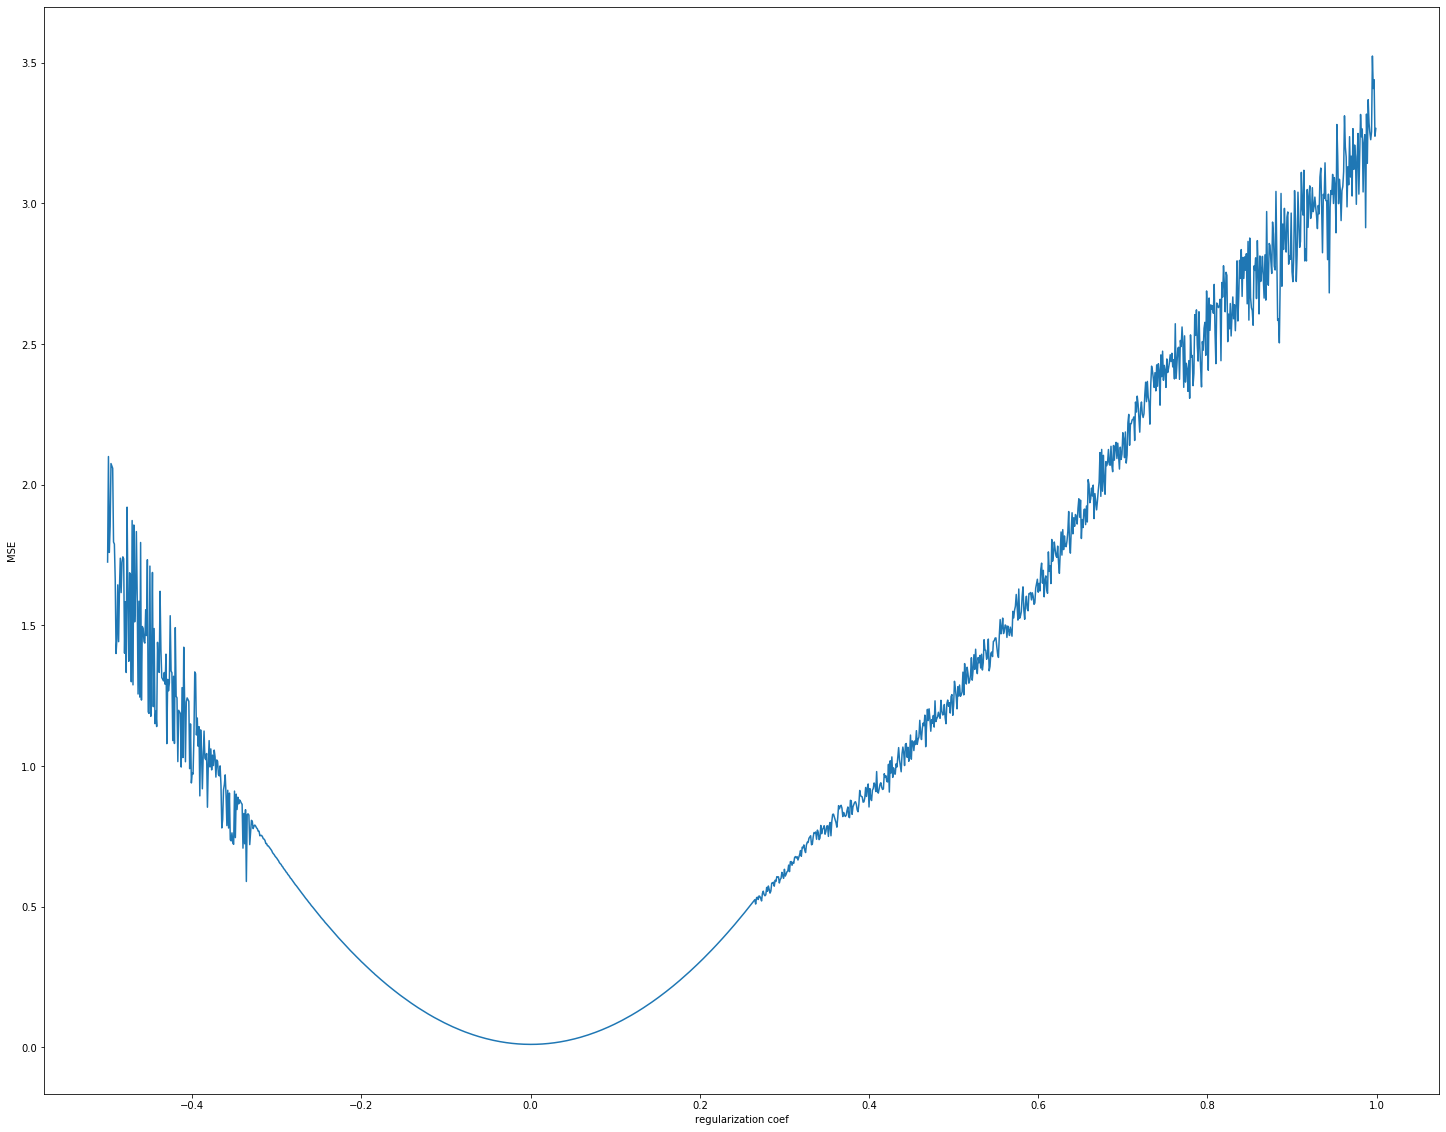

In [16]:
regr = GradientLR(0.1, iterations=100000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

Зачем нужна регуляризация?

### Задание 5 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [17]:
X, y = read_data()

А поскейлить)

In [19]:
from sklearn.preprocessing import scale

In [20]:
X = scale(X)
y = scale(y)

In [21]:
# X /= np.max(abs(X))
# y /= np.max(abs(y))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [23]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.38853393897891414


0.33379365068234884
min at l = 0.8430000000000013, min error = 0.16447319494459778


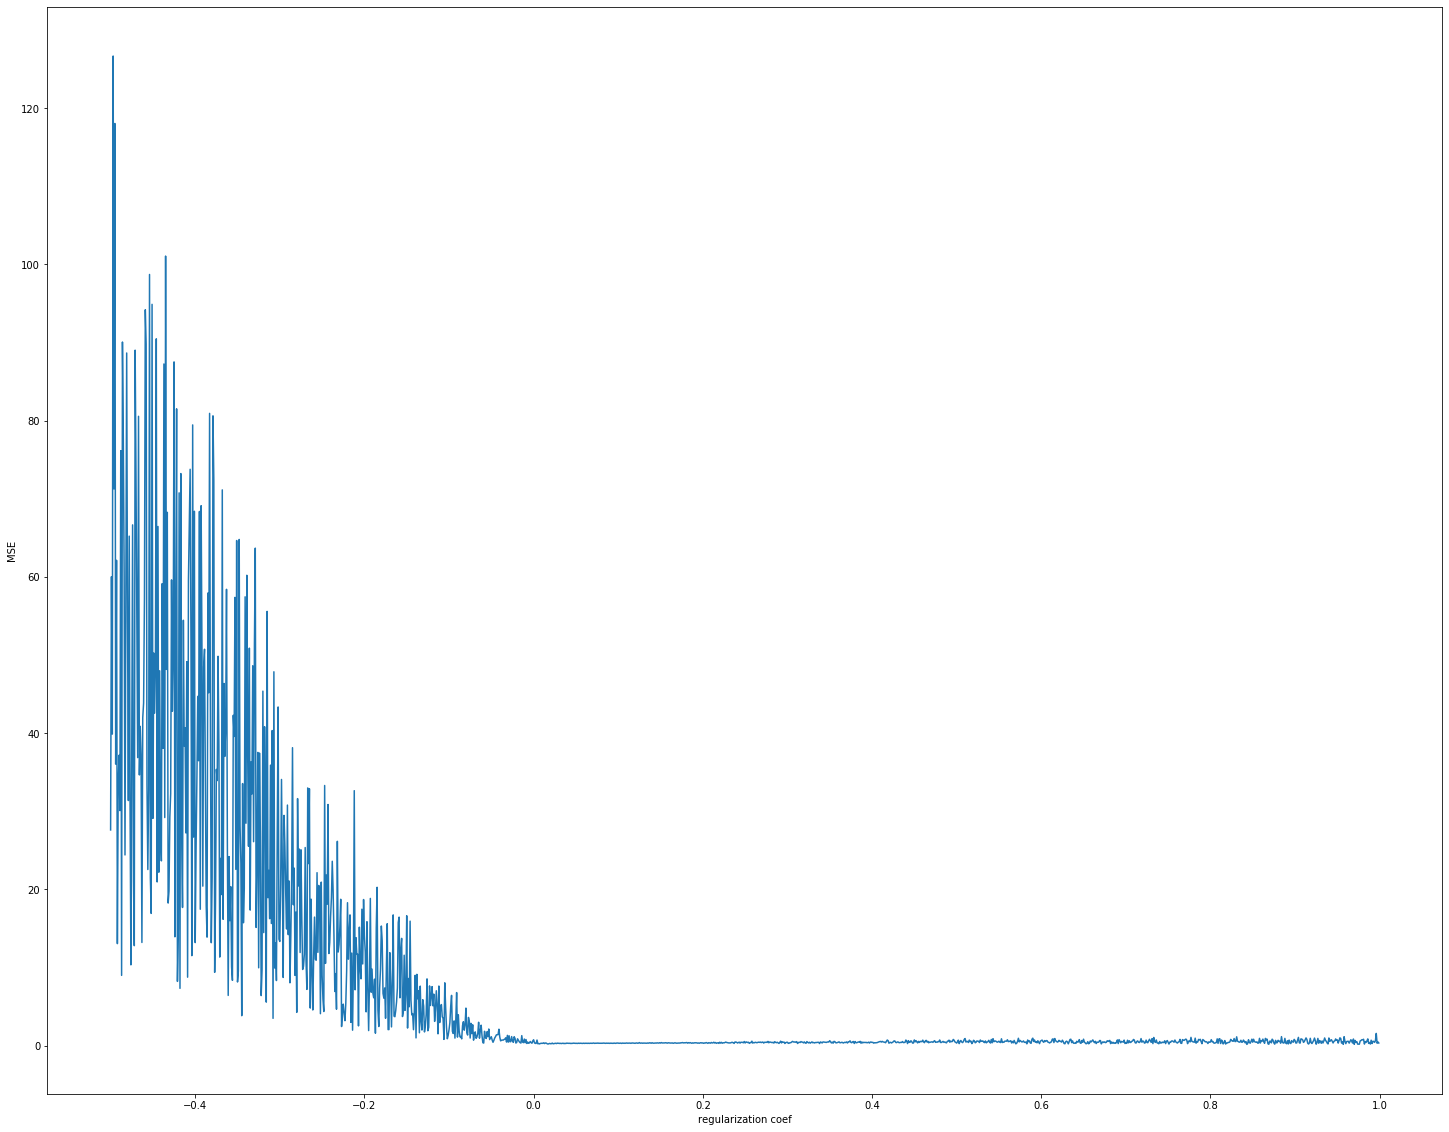

In [41]:
regr = GradientLR(0.1, iterations=100, l = 0.3)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)